# Computer Vision Deep Learning

The codes behind CV is a lot like multiclass classification. We encode the picture into tensors for the computer to understand, and it churns out the **probabailities** of what the photo is (but we need to do labelling of data on the photos first)

CNN layer is a good algorithm to learn from images, as the window convolves through each pixel-turned-tensor-data, and try to learn patterns from the images.

## Frameworks to run

In [1]:
#deep learning
import torch
from torch import nn

#computer viz
import torchvision 
from torchvision import datasets
from torchvision import transforms 
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from helper_functions import plot_decision_boundary
from sklearn.datasets import make_blobs

from tqdm.auto import tqdm

from timeit import default_timer as timer

import helper_functions as hf


In [2]:
train_data = datasets.FashionMNIST(
    root='data', #where to download data to? 
    train=True,  #do we want the training dataset?
    download=True, #download it?
    transform=torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)


test_data = datasets.FashionMNIST(
    root='data', #where to download data to? 
    train=False,  #do we want the training dataset?
    download=True, #download it?
    transform=ToTensor(), #how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)

In [3]:
len(train_data)

60000

In [5]:
#see the first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
#it's a 9! which relates to an ankle boot
image_with_labels = train_data.class_to_idx
image_with_labels
len(image_with_labels)

10

torch.Size([1, 28, 28])


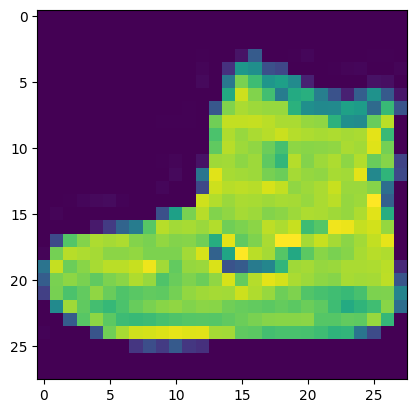

In [7]:
#28 pixels across, 28 pixels down. not very high definition
print(train_data[0][0].shape)
image, label = train_data[0]
plt.imshow(image.squeeze())

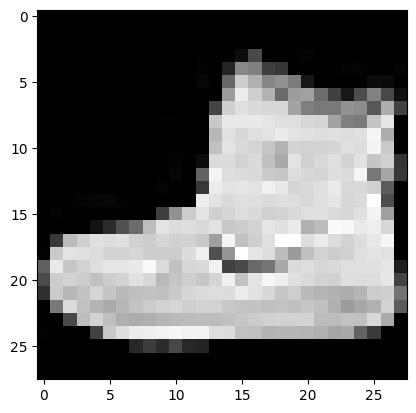

In [8]:
#grayscale
plt.imshow(image.squeeze(), cmap='gray')

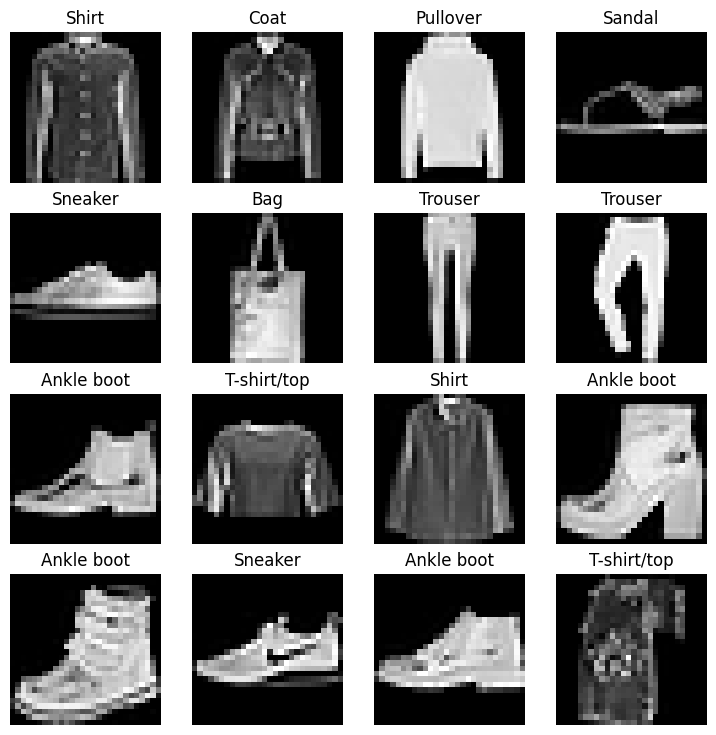

In [9]:
#visualizing more images. 
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx] #img returns a tensor value, which is a representation of an image but with numbers
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(train_data.classes[label])
    plt.axis(False)

### Dataloading

1. More computationally efficient, computing hardware may not be able to look at all the data (maybe 60000) at once
2. Gives our NN more chance to update gradients per epoch

In [10]:
#batch sizes for faster processing
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=32, #
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

In [11]:
#check whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

#we should have batchs size = 32

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'T-shirt/top')

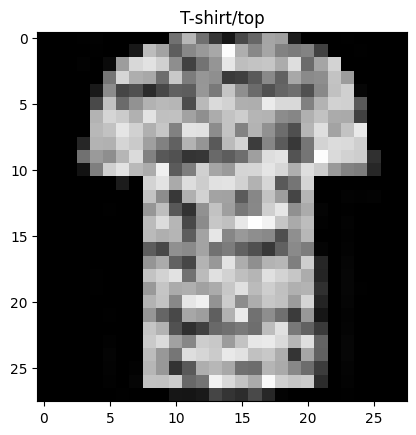

In [12]:
#show the 2nd sample
img, label = train_features_batch[3], train_labels_batch[3]
plt.imshow(img.squeeze(), #removing one dimension
           cmap='gray')
plt.title(train_data.classes[label])

## Let's build our model!

When statrting to build a series of mahcine learning modelling experiments, it's best practive to start with a baseline model, and then improve on it with subsequent features.

AKA. start simply, add complexity when necessary

In [13]:
#Create a flatten layer

flatten_model = nn.Flatten()

x = train_features_batch[0]

output =  flatten_model(x) #perform forward pass

#Print out what happened
print(f'shape before: {x.shape}') #[color channel, height width]
print(f'shape after: {output.shape}') #[color channel, height*width]

shape before: torch.Size([1, 28, 28])
shape after: torch.Size([1, 784])


In [14]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.4588, 0.3059, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5804, 0.5176,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1020, 0.4000,
         0.4941, 0.6039, 0.9137, 0.7569, 0.7333, 0.6471, 0.7490, 0.9804, 0.9137,
         0.6235, 0.6314, 0.5176, 0.2196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0588, 0.5020,
         0.4588, 0.3725, 0.2980, 0.2980, 0.6627, 0.7490, 0.7255, 0.7333, 0.5804,
         0.3843, 0.4157, 0.4000, 0.4588, 0.5804, 0.1098, 0.0000, 0.0078, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2196,
         0.3569, 0.3137, 0.3569, 0.3569, 0.3059, 0.5373, 0.8863, 0.7843, 0.8118,
         0.3059, 0.3647, 0.4510, 0.3922, 0.4353, 0.4510, 0.2980, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [15]:
from torch import nn

class FashionMNISTModel(nn.Module):
    def __init__ (self, input, output, hidden_units):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), #we need this layer, so that our 2D tensor can trained as a 1D vector.
            nn.Linear(in_features=input, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [16]:
#setup our model
model = FashionMNISTModel(input = 784, # 28*28 for training purposes
                         output = 10, # outputs one for each class
                         hidden_units= 10) # units for training 
model 

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1,1,28,28]) #this is the tensor we need to feed into our model. it is common to have an error here
model(dummy_x)

tensor([[ 0.1097,  0.2356, -0.2097,  0.2755,  0.5173, -0.0114, -0.2764, -0.1094,
          0.1787,  0.2903]], grad_fn=<AddmmBackward0>)

In [18]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0345, -0.0048,  0.0249,  ..., -0.0083,  0.0250, -0.0060],
                      [ 0.0343,  0.0017, -0.0288,  ...,  0.0081,  0.0136,  0.0191],
                      [-0.0193, -0.0015, -0.0132,  ...,  0.0182, -0.0095, -0.0133],
                      ...,
                      [ 0.0277,  0.0149, -0.0041,  ..., -0.0190, -0.0275, -0.0216],
                      [-0.0078,  0.0302,  0.0125,  ...,  0.0257, -0.0183, -0.0311],
                      [-0.0152,  0.0302,  0.0252,  ...,  0.0283, -0.0086,  0.0354]])),
             ('layer_stack.1.bias',
              tensor([ 0.0153, -0.0176,  0.0269, -0.0341,  0.0276,  0.0031, -0.0159, -0.0174,
                       0.0341,  0.0217])),
             ('layer_stack.2.weight',
              tensor([[ 0.2037, -0.0837, -0.2063,  0.1234,  0.1087, -0.1006, -0.1947,  0.1609,
                        0.1679,  0.0910],
                      [-0.0468,  0.2336,  0.2775,  0.2376, -0.1374, -0.2444, -0.

### Setup loss, optimizer and eval metrics.

* Loss function - since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - `torch.optin.SGD()`
* Evaluation metric - classification problem, let's use _accuracy_

In [19]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)

### Creating a function to time our experiments

Machine Learning is very experimental

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs

In [40]:

def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start 
    print(f'Train time: {total_time:.3f} seconds')
    return total_time

In [21]:
#looks something like that.

start_time = timer()
#some code
end_time = timer()
print_train_time(start_time, end_time)

Tirain time: 0.000 seconds


9.124982170760632e-06

### Creating a training loop.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out whats happening.
5. Time it.

In [22]:
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    
    train_loss = 0

    #with every batch, we hope that the results get slightly better. 
    #if we are doing individually, it will be slower.
    for batch, (X,y) in enumerate(train_dataloader):
        model.train()

        y_pred = model(X) # this will give us logits. we need to normalize (make it human language) this. 
                            #argmax is the function to use
        loss = loss_fn (y_pred, y)
        train_loss += loss #accumulate train loss

        optim.zero_grad()
        
        loss.backward()

        optim.step()
    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0,0

    model.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test)

            test_acc += hf.accuracy_fn(y_true=y_test, y_pred = test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f'Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

    train_time_end = timer()

print_train_time(train_time_start, train_time_end)

#16:14:45

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.8901 | Test loss: 0.6420, Test acc: 78.4145
Train loss: 0.5634 | Test loss: 0.5502, Test acc: 80.7308
Train loss: 0.5068 | Test loss: 0.5167, Test acc: 81.7991
Tirain time: 5.791 seconds


5.791402750008274

## 4. make predictions and get model results

Lets put our model into a function. This function should evaluate our model performance.

When we are training a different model next time (if we want to improve our models), we are able to compare the metrics easily. 


In [23]:
def eval_model(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


        loss /= len(dataloader)
        acc /= len(dataloader)

    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

model_results = eval_model(model=model, dataloader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=hf.accuracy_fn)

model_results


{'model_name': 'FashionMNISTModel',
 'model_loss': 0.5166699886322021,
 'model_acc': 81.7991214057508}

Right now, our model only has Linear Activations. What about Non-Linear?

Let's try it now! 

# Non-Linear Activations 

In [38]:
class FashionMNISTModelNonLinear(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), #very important for Computer Viz!
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape), 
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

non_linear_model = FashionMNISTModelNonLinear(28*28, #output of the flatten layer.
                                              10, 
                                              10)
non_linear_model

FashionMNISTModelNonLinear(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
#creating a loss function for our new model.
#we are using the exact same algorithm.
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(non_linear_model.parameters(), lr=0.01)

since we have written so many training loops, instead of writing it out yet again, lets put it into a function. 

We can just call the function as and when we like.


In [26]:
def train_model(model: torch.nn.Module,
                train_data_loader: torch.utils.data.DataLoader,
                test_data_loader: torch.utils.data.DataLoader,
                loss_function: torch.nn.Module,
                optimizer: torch.optim,
                epochs: int,
                ):
    train_time_start = timer()

    for epoch in tqdm(range(epochs)):
        
        train_loss = 0

        #with every batch, we hope that the results get slightly better. 
        #if we are doing individually, it will be slower.
        for batch, (X,y) in enumerate(train_data_loader):
            model.train()

            y_pred = model(X) # this will give us logits. we need to normalize (make it human language) this. 
                                #argmax is the function to use
            loss = loss_function(y_pred, y)
            train_loss += loss #accumulate train loss

            optimizer.zero_grad()
            
            loss.backward()

            optimizer.step()

        train_loss /= len(train_data_loader)

        test_loss, test_acc = 0,0

        model.eval()
        with torch.inference_mode():
            for X_test, y_test in test_data_loader:
                test_pred = model(X_test)
                test_loss += loss_fn(test_pred, y_test)

                test_acc += hf.accuracy_fn(y_true=y_test, y_pred = test_pred.argmax(dim=1))
                
            test_loss /= len(test_data_loader)
            test_acc /= len(test_data_loader)

        print(f'Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

        train_time_end = timer()

    print_train_time(train_time_start, train_time_end)
    

In [39]:
train_model(non_linear_model, train_dataloader,test_dataloader, loss_fn, optim, 3)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 2.3134 | Test loss: 2.3133, Test acc: 8.3566
Train loss: 2.3134 | Test loss: 2.3133, Test acc: 8.3566
Train loss: 2.3134 | Test loss: 2.3133, Test acc: 8.3566
Tirain time: 5.836 seconds


ok, so the above was non-linear models.

Now, it's time for the gigachad of computer viz...

##### Convolutional Neural Networks!!!

A convolutional layer is when a neuron only looks at certain regions of an input image

# Let's build a CNN


Here are the main reasons why we need multiple CNN blocks (one block contains multiple layers):

Feature extraction: CNN blocks help in extracting relevant features from the input data. Each block can learn specific patterns and features, such as edges, textures, or shapes. As we go deeper into the network, the **CNN blocks can learn more abstract and higher-level features** that are essential for the task at hand.

Hierarchical representation: Multiple CNN blocks allow the network to build a hierarchical representation of the input data. The **lower-level blocks** capture simple features, and the **higher-level blocks** combine these features to detect more complex patterns and objects.

Non-linearity: Each CNN block introduces non-linearities through activation functions like ReLU (Rectified Linear Unit). These non-linearities enable the network to learn and approximate complex relationships between input features and target outputs.

Information abstraction: With multiple CNN blocks, the network can abstract and summarize information effectively. Pooling layers in each block help reduce spatial dimensions, making the model more efficient while retaining essential information.

Better performance: Deeper networks with **multiple CNN blocks can achieve better performance** on challenging tasks like image recognition, object detection, and segmentation. The increased depth allows the model to learn intricate patterns and achieve a higher level of accuracy.

Transfer learning: Multiple CNN blocks make it easier to apply transfer learning, where a pre-trained CNN can be used as a feature extractor for a new task. The earlier layers capture general features, and the later layers can be fine-tuned for the specific task.

In [33]:
class CNNFashionMNIST(nn.Module):
    '''we are gonna model off from Tiny VGG'''
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, #refer to 'what is a CNN' to understand these parameters better
                      out_channels=hidden_units,
                      kernel_size=3, #determine the size of a square matrix (in some cases, it is not a square),
                                    #which will calculate our image. each unit represents a pixel
                      stride=1, #how much pixels will it skip. 
                      padding=1),
            #in summary, the above code tells us that a 3 by 3 matrix will move across the pixels of
            #an image, with step (stride) of 1.
            #in each step, a value for the 3 by 3 matrix is calculated. 
            #the kernel weights are updated each time through the loss functions
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        #------ second block --------
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        #------ and finally to classify these layers --------
        self.classifier = nn.Sequential(
            nn.Flatten(), #flatten to become a 1D tensor, so that our 
            nn.Linear(in_features=hidden_units*7*7,
                    #in this line, we do not know yet what the previous block/layer is going to output.
                      #aka we don't know the shape it is going to churn out. so usually we would run this model, and print out the shape
                      #of the output of the previous block, and then enter it here. 
                      #in this case, it is 7*7 if we enter a 28*28 pixels image. 
                      out_features=output_shape) #output_shape = 10, or the number of classes there are),

        )

    def forward (self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return self.classifier(x)

Max pooling is needed in Convolutional Neural Networks (CNNs) for several reasons:

Down-sampling: Max pooling reduces the spatial dimensions of the feature maps while retaining important features. This downsampling helps in reducing the computational complexity of the model and makes it more efficient during training and inference.

Feature selection: By taking the maximum value within a local region, max pooling helps in selecting the most significant features from that region. It enhances the representation of important patterns or features, making the subsequent layers more effective in capturing relevant information.

Translation invariance: Max pooling introduces some degree of translation invariance to the model. Since the operation only considers the maximum value within a window, the exact location of a feature in that window is less important. This makes the model more robust to small translations or shifts in the input data.

Reducing overfitting: Max pooling can help in reducing overfitting by summarizing the information in the feature maps and preventing the model from memorizing noise or irrelevant details in the data.

Learning hierarchical features: Max pooling is often used in CNN architectures to learn hierarchical features. As the network goes deeper, the receptive field of the pooling operation increases, allowing the model to capture more abstract and complex features.

In [35]:
cnnModel = CNNFashionMNIST(input_shape=1,
                           hidden_units=10,
                           output_shape=len(image_with_labels))

In [36]:
#initialize loss and optimizers

loss_fn = nn.CrossEntropyLoss() #best for multi class problems
optim = torch.optim.SGD(params=cnnModel.parameters(),lr=0.1)


## Training a CNN Model!

In [37]:
train_model(cnnModel, train_dataloader,
            test_dataloader,
            loss_fn,
            optim, 3)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.5740 | Test loss: 0.3862, Test acc: 85.3634
Train loss: 0.3481 | Test loss: 0.3435, Test acc: 87.4501
Train loss: 0.3075 | Test loss: 0.3147, Test acc: 88.7280
Tirain time: 82.120 seconds
